In [39]:
import pandas as pd # data wrangling
import numpy as np #linear algebra
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # data visualization
import warnings
warnings.filterwarnings("ignore")

In [40]:
#importing data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [43]:
#Dimenssion of data
train.shape

(2000, 21)

In [44]:
#checking missing values in train and test data set
a = train.isnull().values.any()
b = test.isnull().values.any()
print("Train :",a," Test : ",b)

Train : False  Test :  False


In [45]:
#Renaming column name for train data set
train = train.rename(columns = {'pc':'RearCamera', 'fc':'FrontCamera', 'sc_h':'ScreenHight',
                                'sc_w':'ScreenWidth','m_dep':'MobileDepth','px_width':'PixelWidth',
                                'ram':'Ram','int_memory':'Rom','four_g':'4G',
                                'three_g': '3G','dual_sim':'DualSim','battery_power':'BatteryPower','touch_screen':'TouchScreen',
                                'clock_speed':'ClockSpeed','n_cores':'Core','wifi':'WiFi','talk_time':'TalkTime',
                                'price_range':'PriceRange','blue':'Bluetooth','px_height':'PixelHieght','mobile_wt':'MobileWeight'})

In [46]:
#Renaming column name for test data set
test = test.rename(columns = {'id':'ID','pc':'RearCamera', 'fc':'FrontCamera', 'sc_h':'ScreenHight',
                                'sc_w':'ScreenWidth','m_dep':'MobileDepth','px_width':'PixelWidth',
                                'ram':'Ram','int_memory':'Rom','four_g':'4G',
                                'three_g': '3G','dual_sim':'DualSim','battery_power':'BatteryPower','touch_screen':'TouchScreen',
                                'clock_speed':'ClockSpeed','n_cores':'Core','wifi':'WiFi','talk_time':'TalkTime',
                                'price_range':'PriceRange','blue':'Bluetooth','px_height':'PixelHieght','mobile_wt':'MobileWeight'})

In [47]:
#Checking data types 
train.dtypes

BatteryPower      int64
Bluetooth         int64
ClockSpeed      float64
DualSim           int64
FrontCamera       int64
4G                int64
Rom               int64
MobileDepth     float64
MobileWeight      int64
Core              int64
RearCamera        int64
PixelHieght       int64
PixelWidth        int64
Ram               int64
ScreenHight       int64
ScreenWidth       int64
TalkTime          int64
3G                int64
TouchScreen       int64
WiFi              int64
PriceRange        int64
dtype: object

In [48]:
#Checking data types 
train.dtypes

BatteryPower      int64
Bluetooth         int64
ClockSpeed      float64
DualSim           int64
FrontCamera       int64
4G                int64
Rom               int64
MobileDepth     float64
MobileWeight      int64
Core              int64
RearCamera        int64
PixelHieght       int64
PixelWidth        int64
Ram               int64
ScreenHight       int64
ScreenWidth       int64
TalkTime          int64
3G                int64
TouchScreen       int64
WiFi              int64
PriceRange        int64
dtype: object

In [49]:
#checking price range by group by
PriceRange_Group = train.groupby('PriceRange')
PriceRange_Group.mean()

,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,Core,RearCamera,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi
PriceRange,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


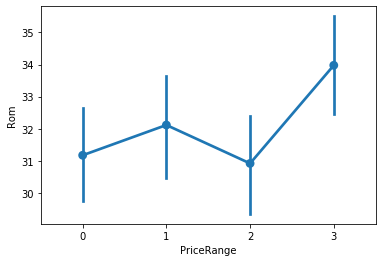

In [50]:
sns.pointplot(y = "Rom", x = "PriceRange", data = train)

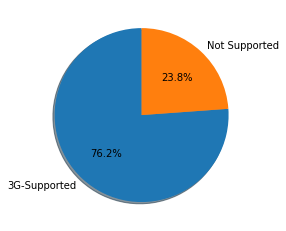

In [51]:
labels = ["3G-Supported",'Not Supported']
values=train['3G'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

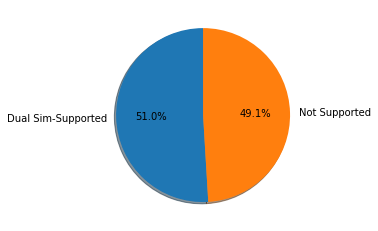

In [52]:
labels = ["Dual Sim-Supported", "Not Supported"]
values = train['DualSim'].value_counts().values
fig1, ax1 =plt.subplots()
ax1.pie(values, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

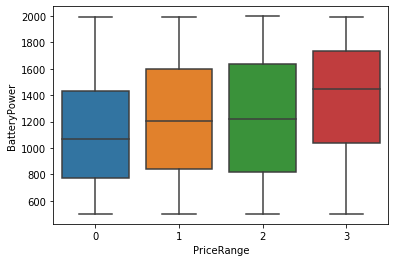

In [53]:
sns.boxplot(x="PriceRange", y="BatteryPower", data=train)

Text(0.5, 0, 'MegaPixels')

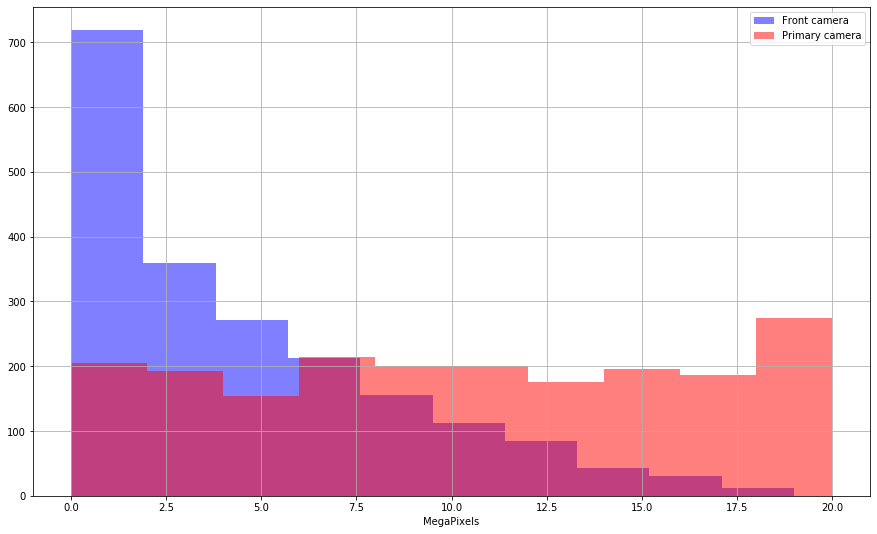

In [54]:
plt.figure(figsize=(15,9))
train['FrontCamera'].hist(alpha=0.5,color='blue',label='Front camera')
train['RearCamera'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [55]:
train.Bluetooth.value_counts()

0    1010
1     990
Name: Bluetooth, dtype: int64

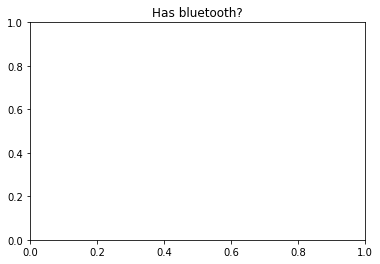

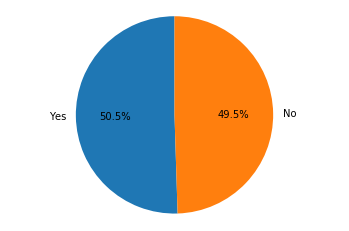

In [56]:
plt.title('Has bluetooth?')
labels = 'Yes', 'No'
sizes=train['Bluetooth'].value_counts().values
#sizes = [990, 1010]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

Text(0.5, 1.0, 'Price Range/ Bluetooth')

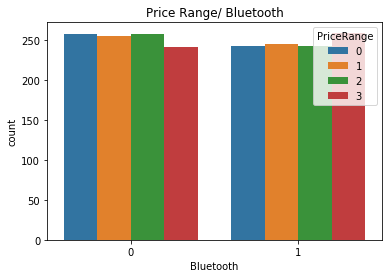

In [57]:
sns.countplot(x='Bluetooth', data=train, hue='PriceRange')
plt.title('Price Range/ Bluetooth')

In [58]:
X = train.drop('PriceRange',axis=1)
X.head()

,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,Core,RearCamera,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [59]:
y = train['PriceRange']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: PriceRange, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [61]:
print(X.shape)

(2000, 20)


In [62]:
print(y.shape)

(2000,)


In [63]:
print(y_train)

61      0
853     0
680     3
455     2
130     3
850     3
413     2
1413    2
375     2
835     3
1213    1
1159    0
25      2
792     2
1510    1
536     0
1462    3
583     0
54      2
691     0
33      3
1281    3
1320    1
548     2
1381    3
769     1
1016    0
1736    1
1253    0
1811    1
       ..
883     1
1949    2
371     1
136     1
1530    0
623     2
1875    0
49      3
40      2
477     0
908     1
1029    2
1134    0
1728    1
732     0
316     1
1781    3
936     3
575     2
1668    1
1576    0
973     2
1417    1
75      1
599     0
1599    3
1862    0
1361    0
1547    2
863     0
Name: PriceRange, Length: 1340, dtype: int64


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predicted_price = logreg.predict(X_test)
predicted_price

array([1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 3, 1,
       2, 3, 3, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 1, 1, 0, 1, 1, 1, 3, 3, 3,
       3, 0, 2, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 3, 1, 2, 3, 1, 2,
       0, 0, 3, 3, 0, 1, 0, 3, 2, 0, 1, 3, 0, 2, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 3, 2, 1, 1, 2, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 0, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 1, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 0, 2, 1, 2, 1,
       3, 2, 2, 0, 3, 2, 2, 1, 2, 2, 0, 2, 1, 0, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 3, 3, 2, 1, 1, 1, 0, 3, 3, 1, 3, 0, 3, 0, 0, 3, 2, 0, 1, 0, 0,
       3, 0, 1, 1, 3, 2, 1, 3, 0, 3, 1, 3, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 1, 3, 1, 3, 1, 0, 2, 2,
       2, 3, 0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 0, 1, 2, 0, 3, 3, 1, 3, 1, 1, 2, 1, 2, 0, 3, 1, 3, 1, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0, 1, 3,

In [67]:
len(predicted_price)

660

In [68]:
logreg.score(X_train, y_train)

0.7895522388059701

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
score = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(score)
print(score.mean())

[0.79  0.79  0.77  0.755 0.83  0.775 0.715 0.78  0.795 0.76 ]
0.776
